In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
from os import path

In [2]:
def plot_and_save(df, name, kind='line', xlabel=None, ylabel=None, **kwargs):
    ax = df.plot(kind=kind, **kwargs)
    
    if xlabel != None:
        ax.set_xlabel(xlabel)
    if ylabel != None:
        ax.set_ylabel(ylabel)
    plt.tight_layout(0.4)
    
    ax.legend().set_visible(False)
    mpl.pyplot.savefig("../../paper/plots/" + name + "_no_legend.pdf", dpi=300)
    ax.legend().set_visible(True)
    mpl.pyplot.savefig("../../paper/plots/" + name + ".pdf", dpi=300)

In [3]:
def read(name):
    df = pd.read_csv("../../paper/plots/{}.csv".format(name), header=0, index_col=0)
    if path.isfile("../../paper/plots/{}_std_err.csv".format(name)):
        return (df, pd.read_csv("../../paper/plots/{}_std_err.csv".format(name), header=0, index_col=0))
    return (df, None)

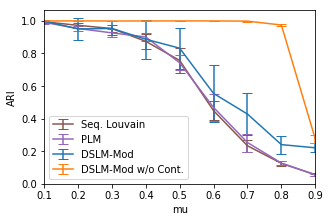

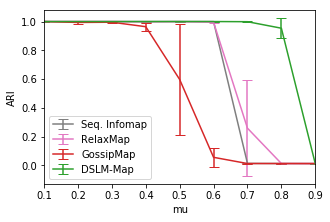

In [5]:
(df, err) = read("quality_ARI")
mod_algos = ['Seq. Louvain', 'PLM', 'DSLM-Mod', 'DSLM-Mod w/o Cont.']
map_algos = ['Seq. Infomap', 'RelaxMap', 'GossipMap', 'DSLM-Map']
plot_and_save(df[mod_algos], 'quality_ARI_mod', yerr=err[mod_algos], figsize=(4.5, 3), ylabel="ARI", capsize=5, color=['C5', 'C4', 'C0', 'C1'])
plot_and_save(df[map_algos], 'quality_ARI_map', yerr=err[map_algos], figsize=(4.5, 3), ylabel="ARI", capsize=5, color=['C7', 'C6', 'C3', 'C2'])

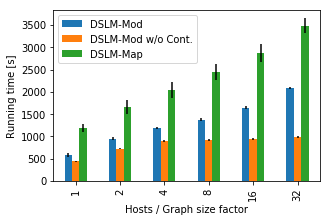

In [6]:
(df, err) = read("weak_scaling_runtime")
plot_and_save(df, "weak_scaling_runtime", yerr=err, kind='bar', figsize=(4.5, 3), ylabel="Running time [s]", xlabel="Hosts / Graph size factor")

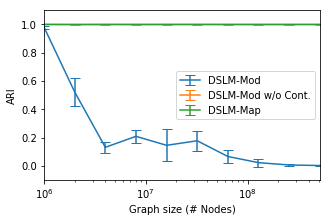

In [7]:
(df, err) = read("weak_scaling_ARI")
plot_and_save(df, 'weak_scaling_ARI', yerr=err, figsize=(4.5, 3), ylabel="ARI", xlabel="Graph size (# Nodes)", logx=True, style=['-*', '-x', '-v'], ylim=(-0.1, 1.1), capsize=5)